In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

# Lab 5 -- Transiting exoplanet from TESS

## Plase write your group members' names below

In this lab we will explore the transit method for detecting and characterizing extrasolar planets, using real data from the TESS mission

In [ ]:
#Josephine Brozny, ...

In [33]:
# load the data and print out variable names
f = fits.open('hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits')
print(f.info())
print(f[1].data.names)

Filename: hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU     65   1148R x 13C   [D, J, E, E, E, J, J, E, E, E, E, E, E]   
None
['TIME', 'CADENCENO', 'SAP_FLUX', 'KSPSAP_FLUX', 'KSPSAP_FLUX_ERR', 'QUALITY', 'ORBITID', 'SAP_X', 'SAP_Y', 'SAP_BKG', 'SAP_BKG_ERR', 'KSPSAP_FLUX_SML', 'KSPSAP_FLUX_LAG']


### 1. Sample TESS transit light curve

The data are stored in the "LIGHTCURVE" portion of the FITS file, with 
variable names listed above. Looking at those, choose one that you think could represent the flux of the star vs time and write its name as flux_variable_name below. If there is more than one thing you think might be right try them out and see which one makes the most sensible plot!

In [42]:
# write the variable name below
flux_variable_name='SAP_FLUX'

### 2. Identify and mark transit signatures

The plot below should make a light curve (flux of the star vs time).

Identify (by eye is fine) and mark any promising transit signals (periodic drops in brightness) on the light curve plot. Fill in the time in days of the first transit, the period, and the depth of the signal in the variables below and then run the code to mark the transits on the plot.


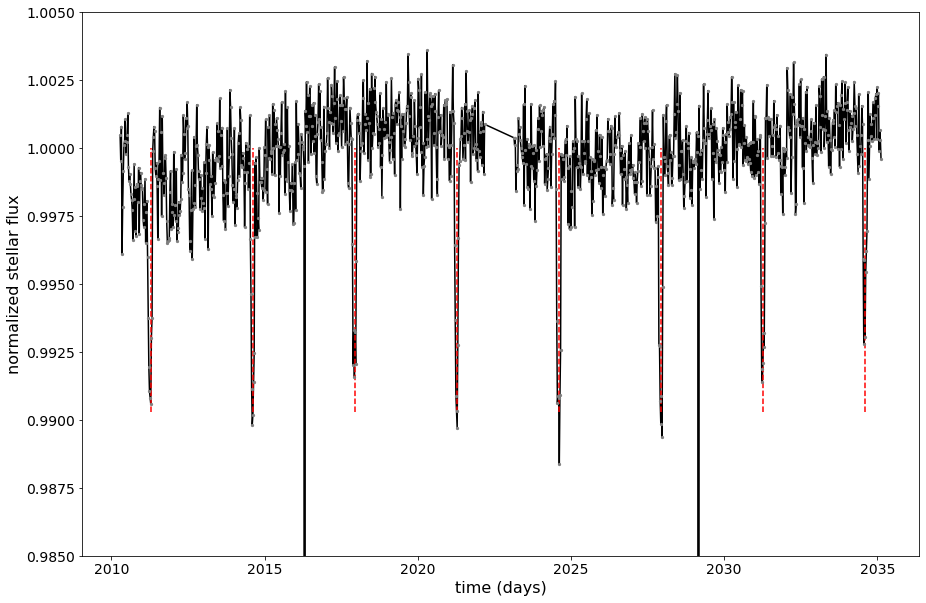

In [64]:
time_variable=f[1].data.field('TIME')
flux_variable=f[1].data.field(flux_variable_name)

fig = plt.figure(figsize=(15,10))
plt.plot(time_variable,flux_variable,color='k')
plt.scatter(time_variable,flux_variable,color='grey',s=5,zorder=3,marker='o')
plt.ylim(0.985,1.005)

plt.xlabel('time (days)',fontsize=16); plt.ylabel('normalized stellar flux',fontsize=16)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


# replace these numbers with your own measurements!
first_transit_time= 2011.3
period= 3.33 # there is also 2 large dips at 2016 days and 2029 days from a different planet transit
depth= .0097

for i in range(8):
    plt.plot(first_transit_time+i*period+np.zeros(50),depth*np.arange(50)/49.+(1.-depth),linestyle='--',color='red')

### 3. Transit duration and depth

Use the plot below to zoom in on one of the transits and measure its duration + depth.

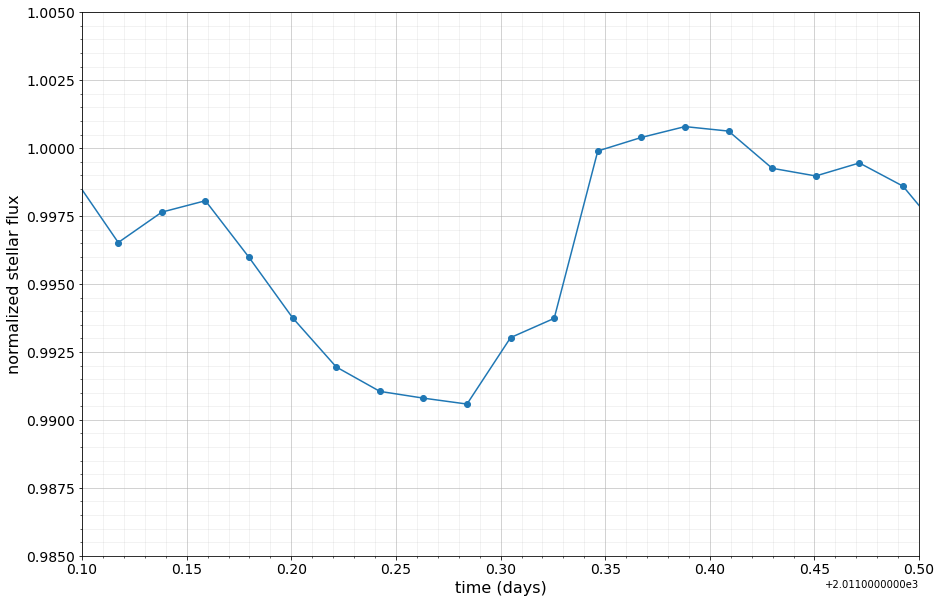

In [65]:
fig = plt.figure(figsize=(15,10))

plt.plot(time_variable,flux_variable,marker="o")
plt.ylim(0.985,1.005)

plt.xlabel('time (days)',fontsize=16); plt.ylabel('normalized stellar flux',fontsize=16)

ax = plt.gca()
ax.yaxis.set_tick_params(labelsize=14);ax.xaxis.set_tick_params(labelsize=14)
plt.grid(visible=True,which='minor',alpha=0.2);plt.grid(visible=True,which='major',alpha=0.7)
plt.minorticks_on()
plt.xlim(first_transit_time-0.2,first_transit_time+0.2)
ax.xaxis.grid(True,which='minor')

##### your estimated duration: .16-.345 is the range, which is .185 total because the planet begins going in front of the star and it covers the star completely at .28 days and then passes it finally at .345 [days]
#### your estimated depth: 1.00- .9905 = .0095 is the depth (because I subtracted from the top of the peak to the bottom of the valley

### 4. The radius of the exoplanet

Write an equation for the radius of the exoplanet. What quantity does it depend on that we haven't measured from the transit light curve? [*Hint*: what ratio should the amount of light blocked depend on?]

Find the needed information in the FITS file header below, and solve for the radius of the planet in units of Earth radii.

In [70]:
print(f[0].header)

depth = .0095
stellar_r = 1.69483*(109.076) #converted to earth radii
planet_r = ((depth)*((stellar_r)**2))**(1/2)

print (planet_r, "in earth radii for planet radii")



SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  NEXTEND =                    1 / number of standard extensions                  EXTNAME = 'PRIMARY '           / name of extension                              ORIGIN  = 'MIT/QLP '           / institution responsible for creating this file TELESCOP= 'TESS    '           / telescope                                      INSTRUME= 'TESS Photometer'    / detector type                                  FILTER  = 'TESS    '           / the filter used for the observations           OBJECT  = 'TIC 157586003'      / string version of TICID                        TICID   =            157586003 / unique TESS target identifier                  SECTOR  =                   26 / last ob

### 5. Transit duration and orbital semi-major axis

Use your measured transit duration and period to solve for the semi-major axis of the binary orbit. Express your answer in terms of the Earth-Sun distance 1AU = 1.5x10^13 cm. You may assume that the inclination is exactly edge-on ($i = 90^\circ$), although note that we do not know that here! [*Hint*: how far does the exoplanet travel during the transit?]

Using the semi-major axis and Kepler's 3rd law, solve for the total mass of the system in solar masses. [Note: if you see the mass reported in the header above and are confused by the large discrepancy...so am I. It's definitely wrong so don't be distracted by it].

In [114]:
p = (3.3/365) #days converted to years
a = (p**(2/3))
print ("Semi major axis in AU:",a)

new_a = (a)*(1.496E11) #in m
new_p = (3.3)*(86400) # in s
G = 6.67E-11 # m^3/kgs^2
pi_squared = (3.14**2)

M = ((4)*(pi_squared)*(new_a**3))/((G)*(new_p**2))
M_solar = (M/(2E30))

print ("Mass of total system in kg:", M)

print ("Mass of total system in solar masses:", M_solar)

Semi major axis in AU: 0.04339909936396957
Mass of total system in kg: 1.9905588428337804e+30
Mass of total system in solar masses: 0.9952794214168902


### 6. Planet mass from the radial velocity

This system also has radial velocity measurements, which show a line of sight velocity amplitude of $0.04$ km s$^{-1}$. Solve for the mass of the planet (in units of solar masses), assuming it is much smaller than that of its host star. [*Hint*: recall the binary mass function!]

In [120]:
i = (90*np.pi)/180 # convert from degrees to radians and assume 90 degrees like above for line of sight
pi = 3.1415
P = new_p
G_cm = 6.67E-8 # the gravitional constant in cm
v_r = .04*(1E5) #km/s to cm/s
m_total = ((M)*1000)**2 #kg to grams and then squaring

num = (v_r**3)* P * m_total #numerator
den = (2*np.pi * G_cm * (np.sin(i)**3))

M_planet = (num/den)**(1/3)

print ("Mass of planet:", M_planet, "grams")

M_earth = 5.97E27 # in grams

Planet_mass_in_Earth = M_planet / M_earth

print ("Mass of planet in Earth masses:", Planet_mass_in_Earth)

Mass of planet: 5.566950139240957e+29 grams
Mass of planet in Earth masses: 93.24874605093729


### 7. Daytime temperature

Given the effective temperature of the star above, how would the daytime temperature of the planet compare to that of Earth? [*Hint*: if you assume the only thing heating the planet is the incident starlight, what should this ratio depend on?]

In [119]:
T_eff_star = 5835 #k 

T_eff_Sun = 5780 #k

T_eff_Earth = 288 #k

T_eff_planet = (T_eff_star *T_eff_Earth)/(T_eff_Sun)

print ("Effective temp of the planet in K:", T_eff_planet)

Effective temp of the planet in K: 290.74048442906576


### 8. Characterize the star - exoplanet system

Using your results above, how do the properties of this extrasolar planet compare to those in the Solar system? Which planet is it most similar to in radius and mass? Is its orbital location similar to where that planet is found in the Solar system?

Properties of solar system planets are listed e.g. at this link
https://nssdc.gsfc.nasa.gov/planetary/factsheet/


##### This appears to be as massive as Saturn because Saturn is 95 Earth masses, and this planet is 93 Earth masses.  Also, it is 11x closer than Mercury's current location (57.9E6 km) and this planet is roughly 5E6 km with the effective temperature of Earth roughly. So it's a gas giant clearly, due to it having a radius 18x of the Earth, which is comparable with Jupiter's radius of 11.2x of the Earth.

##### This planet is most likely a hot jupiter since it has the size comparable to Jupiter but it orbits its star at very close distances. It has much higher surface- atmosphere temperatures comparable to that of the Earth as we have seen in our calculations from the data. 